# HR Analytics Demo on Attrition

I have taken the below fictional data set created by IBM data scientists in order to do a quick analysis between attrition and the following 3 factors: age, monthly income and number of years in the company.

Dataset taken from: https://www.kaggle.com/faressayah/ibm-hr-analytics-employee-attrition-performance

In [36]:
# Read csv, load into a dataframe and display
import pandas as pd
import numpy as np

df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [39]:
# Keeping only relevant columns for the analysis
df2 = df[['Attrition','Age','MonthlyIncome','YearsAtCompany']]
df2.head()

,Attrition,Age,MonthlyIncome,YearsAtCompany
0,Yes,41,5993,6
1,No,49,5130,10
2,Yes,37,2090,0
3,No,33,2909,8
4,No,27,3468,2


In [40]:
#Describe dataset
df2.describe()

,Age,MonthlyIncome,YearsAtCompany
count,1470.000000,1470.000000,1470.000000
mean,36.923810,6502.931293,7.008163
std,9.135373,4707.956783,6.126525
min,18.000000,1009.000000,0.000000
25%,30.000000,2911.000000,3.000000
50%,36.000000,4919.000000,5.000000
75%,43.000000,8379.000000,9.000000
max,60.000000,19999.000000,40.000000


In [49]:
# List columns that are measures and exclude the attrition column
col = []
for column in df2.columns:
    col.append(column)
col.remove('Attrition')

In [50]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.1.1


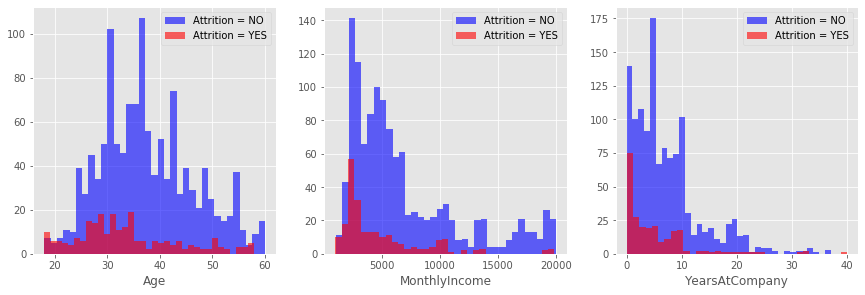

In [54]:
plt.figure(figsize=(20, 10))

for i, column in enumerate(col, 1):
    plt.subplot(2, 4, i)
    df[df["Attrition"] == 'No'][column].hist(bins=35, color='blue', label='Attrition = NO', alpha=0.6)
    df[df["Attrition"] == 'Yes'][column].hist(bins=35, color='red', label='Attrition = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

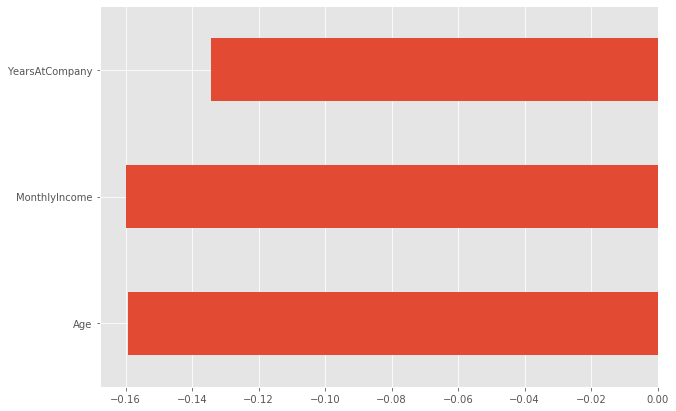

In [59]:
df2.drop('Attrition', axis=1).corrwith(df2.Attrition).plot(kind='barh', figsize=(10, 7))